In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import datetime

In [17]:
# ordering game logs by date
df = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/game_logs_1946-2016/game_logs1997-98.csv')
df.sort_values('GAME_DATE', inplace=True)

In [18]:

df.GAME_DATE = pd.to_datetime(df.GAME_DATE)
df.index = df.GAME_DATE
df.head()

,Unnamed: 0,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
1997-10-31,24000,21997,1519,John Thomas,BOS,Boston Celtics,29700001,1997-10-31,BOS vs. CHI,W,...,1,2,0,1,0,1,1,0,-7,0
1997-10-31,14957,21997,64,Sam Perkins,SEA,Seattle SuperSonics,29700013,1997-10-31,SEA @ POR,W,...,3,3,4,1,1,0,2,6,7,0
1997-10-31,14956,21997,168,Chris Mills,NYK,New York Knicks,29700006,1997-10-31,NYK @ CHH,W,...,4,5,1,0,0,1,3,6,-4,0
1997-10-31,14955,21997,71,Pooh Richardson,LAC,Los Angeles Clippers,29700011,1997-10-31,LAC @ PHX,L,...,0,1,2,0,0,1,1,6,-9,0
1997-10-31,6559,21997,209,Dell Curry,CHH,Charlotte Hornets,29700006,1997-10-31,CHH vs. NYK,L,...,2,3,2,2,0,6,6,14,-1,0


In [16]:
# df.sort_values(df.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24001 entries, 1998-04-07 to 1997-10-31
Data columns (total 31 columns):
Unnamed: 0           24001 non-null int64
SEASON_ID            24001 non-null int64
PLAYER_ID            24001 non-null int64
PLAYER_NAME          24001 non-null object
TEAM_ABBREVIATION    24001 non-null object
TEAM_NAME            24001 non-null object
GAME_ID              24001 non-null int64
GAME_DATE            24001 non-null datetime64[ns]
MATCHUP              24001 non-null object
WL                   24001 non-null object
MIN                  24001 non-null int64
FGM                  24001 non-null int64
FGA                  24001 non-null int64
FG_PCT               22695 non-null float64
FG3M                 24001 non-null int64
FG3A                 24001 non-null int64
FG3_PCT              10591 non-null float64
FTM                  24001 non-null int64
FTA                  24001 non-null int64
FT_PCT               15119 non-null float64
OREB          

In [19]:
# adding column month
df['month'] = df.GAME_DATE.map(lambda x: x.month)
df.head()

,Unnamed: 0,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,month
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
1997-10-31,24000,21997,1519,John Thomas,BOS,Boston Celtics,29700001,1997-10-31,BOS vs. CHI,W,...,2,0,1,0,1,1,0,-7,0,10
1997-10-31,14957,21997,64,Sam Perkins,SEA,Seattle SuperSonics,29700013,1997-10-31,SEA @ POR,W,...,3,4,1,1,0,2,6,7,0,10
1997-10-31,14956,21997,168,Chris Mills,NYK,New York Knicks,29700006,1997-10-31,NYK @ CHH,W,...,5,1,0,0,1,3,6,-4,0,10
1997-10-31,14955,21997,71,Pooh Richardson,LAC,Los Angeles Clippers,29700011,1997-10-31,LAC @ PHX,L,...,1,2,0,0,1,1,6,-9,0,10
1997-10-31,6559,21997,209,Dell Curry,CHH,Charlotte Hornets,29700006,1997-10-31,CHH vs. NYK,L,...,3,2,2,0,6,6,14,-1,0,10


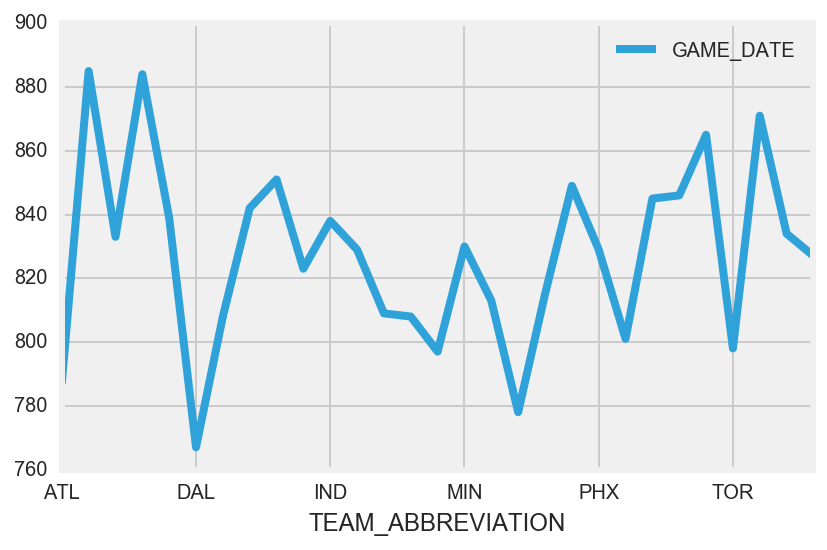

In [24]:
df.groupby(['TEAM_ABBREVIATION'])[['GAME_DATE']].count().plot()